In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Try importing tqdm for progress bar

try:
    from tqdm import tqdm
    
except ImportError:
    # Substitute dummy function if not available
    def tqdm(iterable, *args, **kwargs):
        return iterable

In [4]:
from Bio.Seq import Seq

# Import seqanalysis.py

Replace this with the correct file path for your system.

In [5]:
run ~/git/buds-ucsf-2017/sequence_analysis/seqanalysis.py

# Open files

In [6]:
# Edit this
data_dir = '/Users/student/projects/pubs/seq/'

In [7]:
seq_files = [data_dir + 'R{}_sample200x.fastq'.format(i + 1) for i in range(3)]

In [8]:
triplets = list(tqdm(zip_reads(seq_files, 'fastq'), total=100_000))

 98%|█████████▊| 98044/100000 [00:19<00:00, 4957.57it/s] 


In [9]:
# By read number
reads = list(zip(*triplets))

In [10]:
with open(data_dir + 'wt_seq.txt') as fobj:
    wt_seq = Seq(fobj.read())

# Get read stats

In [11]:
def iter_reads():
    """Iterate through all reads in all triplets"""
    return (read for triplet in triplets for read in triplet)

In [12]:
# Create table with header data to start
read_stats = pd.DataFrame.from_records(
    [
        (i,) + parse_illumina_header(read.description)
        for i, triplet in enumerate(tqdm(triplets))
        for read in triplet
    ],
    columns=('triplet',) + IlluminaHeader._fields,
)
read_stats.set_index(['triplet', 'read'], inplace=True)

100%|██████████| 98044/98044 [00:02<00:00, 42212.36it/s]


Calculate additional columns

In [13]:
read_stats['length'] = [len(read) for read in iter_reads()]

read_stats['n_count'] = [read.seq.count('N') for read in iter_reads()]

read_stats['n_frac'] = read_stats['n_count'] / read_stats['length']

read_stats['min_quality'] = [ min(read.letter_annotations['phred_quality']) for read in iter_reads()]

read_stats['mean_quality'] = [ sum(read.letter_annotations['phred_quality']) / len(read) for read in iter_reads()]

In [14]:
read_stats.head(21)

instrument  run      flowcell_id  lane  tile   xpos  ypos  \
triplet read                                                             
0       1        M00582  215  000000000-B673F     1  2106  18735  1072   
        2        M00582  215  000000000-B673F     1  2106  18735  1072   
        3        M00582  215  000000000-B673F     1  2106  18735  1072   
1       1        M00582  215  000000000-B673F     1  2106  12967  1077   
        2        M00582  215  000000000-B673F     1  2106  12967  1077   
        3        M00582  215  000000000-B673F     1  2106  12967  1077   
2       1        M00582  215  000000000-B673F     1  2106  18442  1079   
        2        M00582  215  000000000-B673F     1  2106  18442  1079   
        3        M00582  215  000000000-B673F     1  2106  18442  1079   
3       1        M00582  215  000000000-B673F     1  2106  12495  1114   
        2        M00582  215  000000000-B673F     1  2106  12495  1114   
        3        M00582  215  000000000-B673F     1  2106  12495  1114   
4       1        M00582  215  000000000-B673F     1  2106  15964  1114   
        2        M00582  215  000000000-B673F     1  2106  15964  1114   
        3        M00582  215  000000000-B673F     1  2106  15964  1114   
5       1        M00582  215  000000000-B673F     1  2106  10327  1124   
        2        M00582  215  000000000-B673F     1  2106  10327  1124   
        3        M00582  215  000000000-B673F     1  2106  10327  1124   
6       1        M00582  215  000000000-B673F     1  2106  14234  1131   
        2        M00582  215  000000000-B673F     1  2106  14234  1131   
        3        M00582  215  000000000-B673F     1  2106  14234  1131   

              is_filtered  controlnum  samplenum  length  n_count    n_frac  \
triplet read                                                                  
0       1           False           0          0     300        3  0.010000   
        2           False           0          0      26       22  0.846154   
        3           False           0          0     200       57  0.285000   
1       1           False           0          0     300        0  0.000000   
        2           False           0          0      26       22  0.846154   
        3           False           0          0     200       48  0.240000   
2       1           False           0          0     300        0  0.000000   
        2           False           0          0      26       22  0.846154   
        3           False           0          0     200       49  0.245000   
3       1           False           0          0     300        0  0.000000   
        2           False           0          0      26       22  0.846154   
        3           False           0          0     200       33  0.165000   
4       1           False           0          0     300        0  0.000000   
        2           False           0          0      26       22  0.846154   
        3           False           0          0     200       33  0.165000   
5       1           False           0          0     300        0  0.000000   
        2           False           0          0      26       22  0.846154   
        3           False           0          0     200       33  0.165000   
6       1           False           0          0     300        0  0.000000   
        2           False           0          0      26       22  0.846154   
        3           False           0          0     200       33  0.165000   

              min_quality  mean_quality  
triplet read                             
0       1               2     28.510000  
        2               2      5.923077  
        3               2     20.045000  
1       1               7     26.566667  
        2               2      4.384615  
        3               2     21.115000  
2       1               7     27.046667  
        2               2      3.961538  
        3               2     14.170000  
3       1               7     

## Investigate

### Read lengths

In [15]:
read_stats.groupby(level=['read'])['length'].unique()

read
1    [300]
2     [26]
3    [200]
Name: length, dtype: object

In [16]:
# Reads are of constant size, store in variable and remove from table

read_lengths = [u[0] for u in _]

del read_stats['length']

### Constant values

In [17]:
# These columns look the same for all reads
const_cols = ['instrument', 'run', 'flowcell_id', 'lane', 'is_filtered', 'controlnum', 'samplenum']

In [18]:
{col: read_stats[col].unique() for col in const_cols}

{'controlnum': array([0]),
 'flowcell_id': array(['000000000-B673F'], dtype=object),
 'instrument': array(['M00582'], dtype=object),
 'is_filtered': array([False], dtype=bool),
 'lane': array([1]),
 'run': array([215]),
 'samplenum': array([0])}

In [19]:
assert all(len(u) == 1 for u in _.values())

Assumption correct, remove these as they give no information.

In [20]:
for col in const_cols:
    del read_stats[col]

## Save

In [38]:
read_stats.to_csv('read_stats.csv')

# Plot basic stats

In [21]:
import seaborn as sns

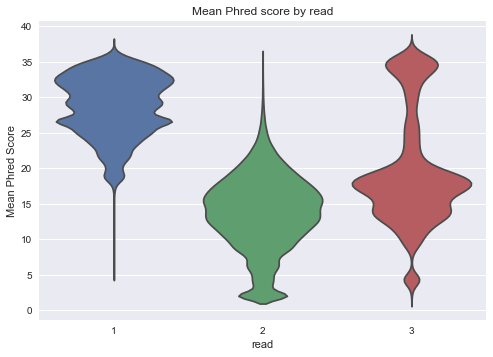

In [22]:
sns.violinplot(x='read', y='mean_quality', data=read_stats.reset_index(),
             scale='width', inner=None)

plt.title('Mean Phred score by read')
plt.ylabel('Mean Phred Score')

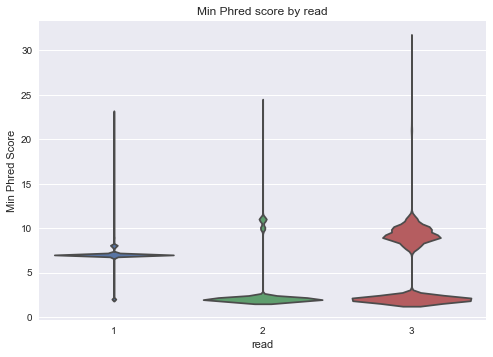

In [23]:
sns.violinplot(x='read', y='min_quality', data=read_stats.reset_index(),
             scale='width', inner=None)

plt.title('Min Phred score by read')
plt.ylabel('Min Phred Score')

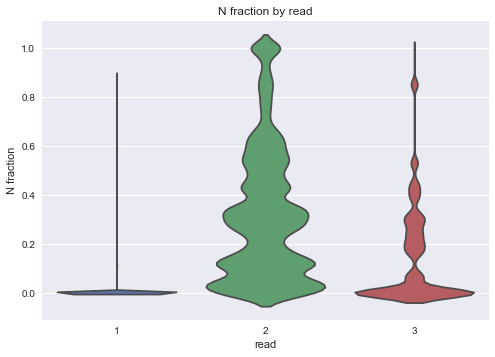

In [24]:
sns.violinplot(x='read', y='n_frac', data=read_stats.reset_index(),
             scale='width', inner=None)

plt.title('N fraction by read')
plt.ylabel('N fraction')

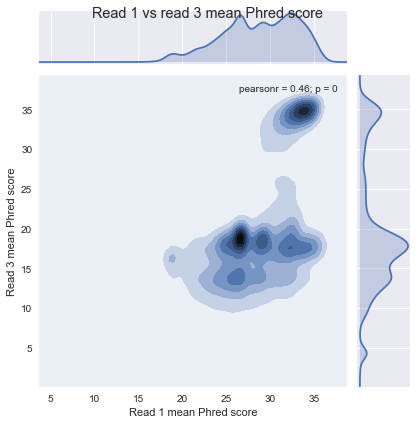

In [25]:
plt.figure(figsize=(10, 10))

jp = sns.jointplot(x=read_stats.xs(1, level='read')['mean_quality'], y=read_stats.xs(3, level='read')['mean_quality'],
              kind='kde', size=6)

plt.suptitle('Read 1 vs read 3 mean Phred score')
jp.ax_joint.set_xlabel('Read 1 mean Phred score')
jp.ax_joint.set_ylabel('Read 3 mean Phred score')

# Quality by position

In [26]:
def quality_matrix(readnum, n, sort=False, which=None):

    mat = np.zeros((n, read_lengths[readnum - 1]), dtype=int)
    
    if which is None:
        indices = np.random.choice(len(triplets), n, replace=False)
    else:
        indices = np.random.choice(np.arange(len(triplets))[which], n, replace=False)

    for i, idx in enumerate(indices):
        read = reads[readnum - 1][idx]
        a = read.letter_annotations['phred_quality']
        mat[i] = a
    
    if sort:
        mat = mat[np.argsort(mat.mean(axis=1))]
    
    return mat

In [28]:
def plot_quality_matrix(readnum, n, transpose=False, sort=True):
    
    mat = quality_matrix(readnum, n, sort=sort)[::-1]
    if transpose:
        mat = mat.T
    
    plt.figure(figsize=(16, 8))

    plt.pcolor(mat, cmap='magma', vmin=0)
    plt.gca().invert_yaxis()

    plt.colorbar()
    
    if transpose:
        plt.ylabel('Read position')
        plt.xticks([])
    
    else:
        plt.xlabel('Read position')
        plt.yticks([])

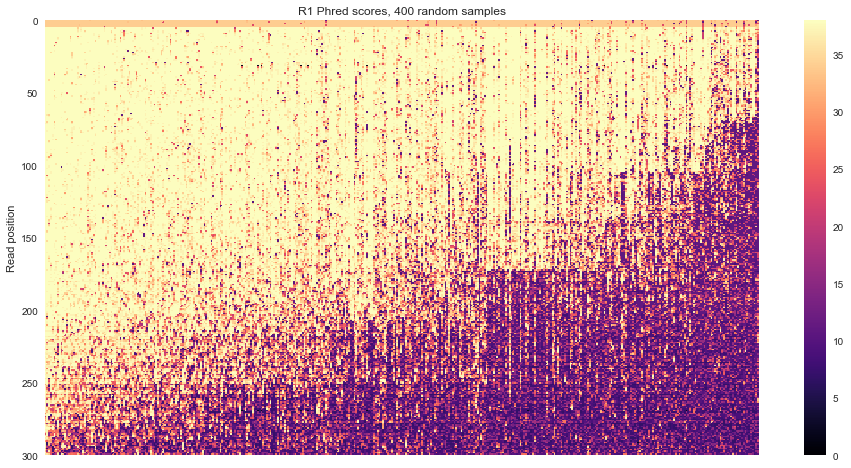

In [29]:
plot_quality_matrix(1, 400, True)
plt.title('R1 Phred scores, 400 random samples')

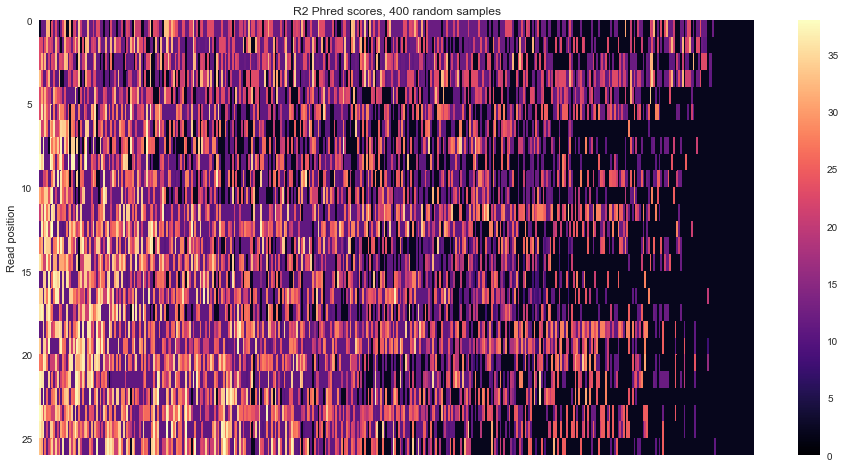

In [30]:
plot_quality_matrix(2, 400, True)
plt.title('R2 Phred scores, 400 random samples')

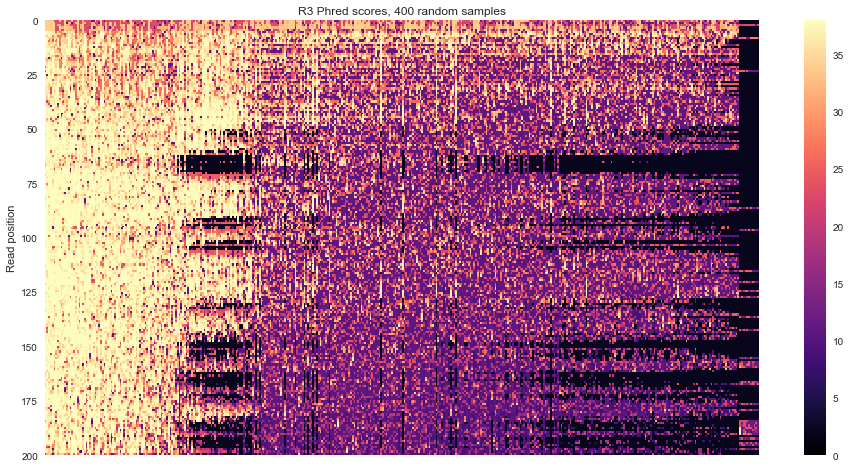

In [31]:
plot_quality_matrix(3, 400, True)
plt.title('R3 Phred scores, 400 random samples')

# Quality by spot position

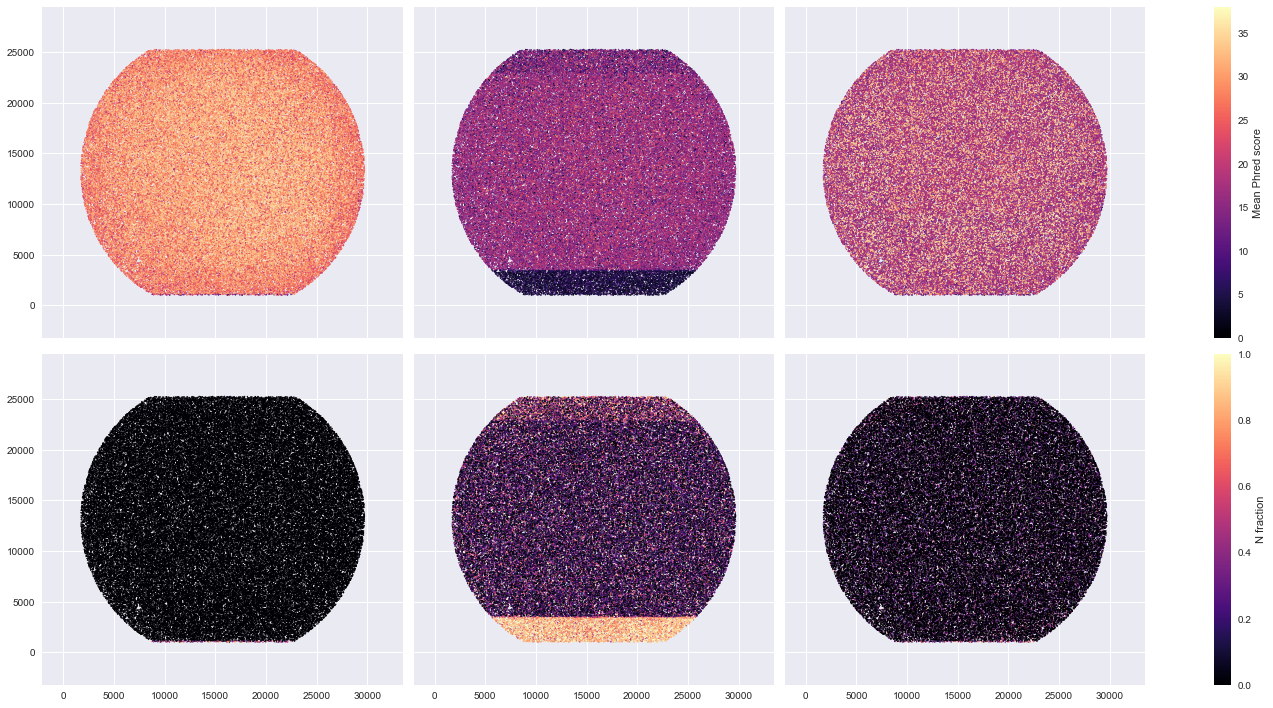

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True, sharey=True, subplot_kw=dict(aspect='equal'))

_scatter_args = dict(s=1, cmap='magma', vmin=0)

max_qual = np.ceil(read_stats['mean_quality'].max())

# Quality
for i, ax in enumerate(axes[0]):
    _stats = read_stats.xs(i + 1, level='read')
    _mappable1 = ax.scatter(_stats['xpos'], _stats['ypos'], c=_stats['mean_quality'], vmax=max_qual, **_scatter_args)
    

# N count
for i, ax in enumerate(axes[1]):
    _stats = read_stats.xs(i + 1, level='read')
    _mappable2 = ax.scatter(_stats['xpos'], _stats['ypos'], c=_stats['n_frac'], vmax=1, **_scatter_args)


plt.tight_layout()
    
_cbar1 = plt.colorbar(_mappable1, ax=list(axes[0]))
_cbar2 = plt.colorbar(_mappable2, ax=list(axes[1]))

_cbar1.ax.set_ylabel('Mean Phred score')
_cbar2.ax.set_ylabel('N fraction')

# Barcodes

## Basic stats

In [33]:
_rows = []

for trip in triplets:
    read = trip[1]
    scores = np.asarray(read.letter_annotations['phred_quality'][-18:])
    
    p = np.prod(1 - 10 ** (scores / -10))
    
    _rows.append((
        read.seq[:18].count('N'),
        scores.min(),
        scores.mean(),
        p,
        np.log10(1 - p) * -10,
    ))
    
bc_stats = pd.DataFrame.from_records(_rows, columns=['n_count', 'min_qual', 'mean_qual', 'p_correct', 'phred_total'])
bc_stats.index.name = 'triplet'

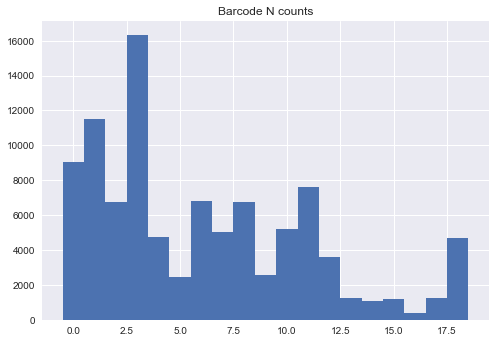

In [34]:
plt.bar(np.arange(bc_stats['n_count'].max() + 1), np.bincount(bc_stats['n_count']), width=1)
plt.title('Barcode N counts')

## Filtered quality scores

In [35]:
bc_no_n = bc_stats.index[bc_stats['n_count'] == 0]

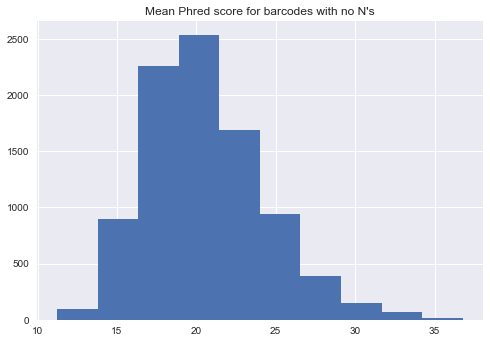

In [36]:
plt.hist(bc_stats.loc[bc_no_n, 'mean_qual'])
plt.title('Mean Phred score for barcodes with no N\'s')

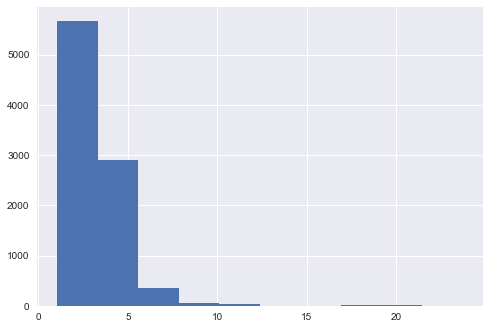

In [37]:
plt.hist(bc_stats.loc[bc_no_n, 'phred_total'])
pass